In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load Image

In [2]:
def read_file(file_path):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.show()

    return img

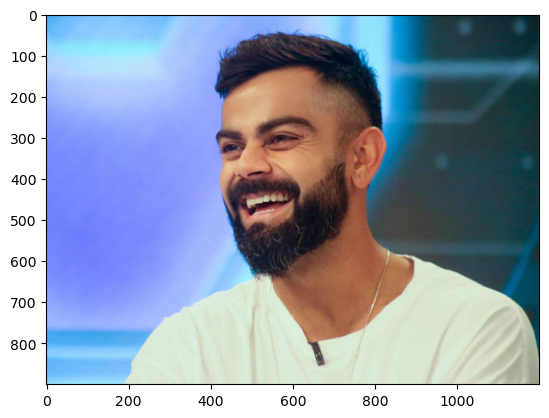

In [30]:
file = "virat-kohli.jpeg"
img = read_file(file)
origin = np.copy(img)

# Edge Mask 

In [4]:
def edge_mask(img, line_size, blur_val):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    gray_blur = cv2.medianBlur(gray, blur_val)

    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, line_size, blur_val)
    
    return edges

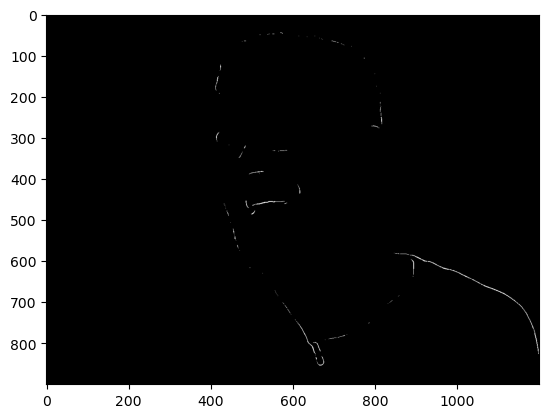

In [31]:
edge_img = edge_mask(img, 5, 11)

plt.imshow(edge_img, cmap="binary")
plt.show()

# Reduce color palette

In [6]:
def color_palette(img, k):

    #Tranform the image
    data = np.float32(img).reshape((-1,3))

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)

    res = center[label.flatten()]

    res = res.reshape(img.shape)

    return res

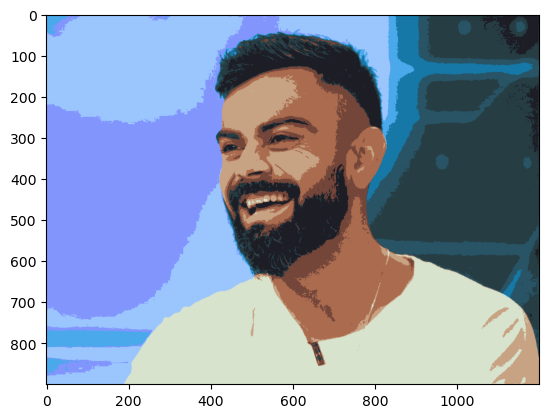

In [32]:
image = color_palette(img, k=11)
plt.imshow(image)
plt.show()

# Reduce noise

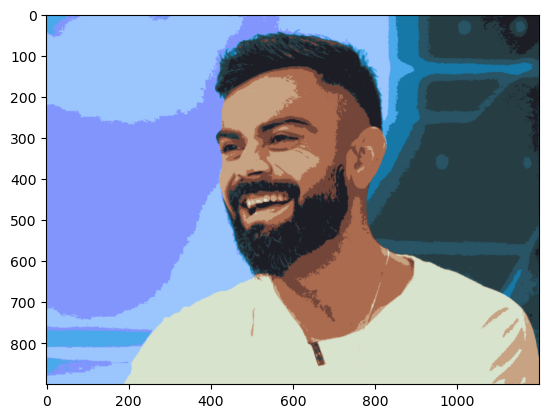

In [33]:
blur = cv2.bilateralFilter(image, d=1, sigmaColor=200, sigmaSpace=100)

plt.imshow(blur)
plt.show()

# Combine edge mask

In [16]:
def cartoon():
    cartoon_img = cv2.bitwise_and(blur, blur, mask=edge_img)
    
    plt.figure(figsize=(15,10))
    plt.subplot(1,2,1)
    plt.title("Cartoon Image")
    plt.imshow(cartoon_img)
    plt.show()

    plt.figure(figsize=(15,10))
    plt.subplot(1,2,2)
    plt.title("Original Image")
    plt.imshow(origin)
    plt.show()

    return cartoon_img

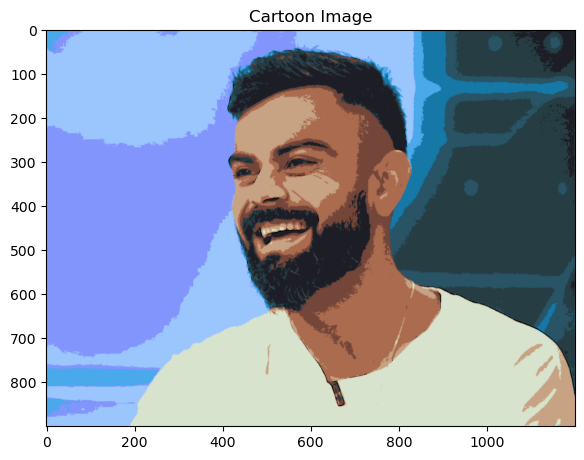

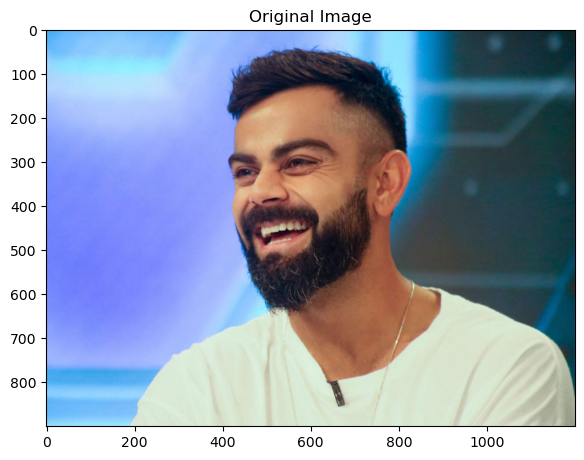

Image Saved Successfully!


In [34]:
cartoon_img = cartoon()
save_img = cv2.imwrite(f"cartoon_img/cartoon_{file}", cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

if save_img == True:
    print("Image Saved Successfully!")
else:
    print("Something Went Wrong!")